In [1]:
%pylab inline
import calin.math.pdf_1d
import scipy.integrate

Populating the interactive namespace from numpy and matplotlib


In [2]:
exp_pdf=calin.math.pdf_1d.LimitedExponentialPDF(0,numpy.inf)
gauss_pdf=calin.math.pdf_1d.LimitedGaussianPDF(0,numpy.inf)
ses = calin.math.pdf_1d.TwoComponentPDF(exp_pdf, "exp", gauss_pdf, "gauss")

In [3]:
print(ses.num_parameters())

4


In [4]:
pars = ses.parameters()
for ipar in pars:
    print(ipar.name)

exp probability
exp.scale
gauss.mean
gauss.rms


In [5]:
p0 = asarray([0.28, 97.6, 484.6, 131.7])
ses.set_parameter_values(p0)

In [6]:
print(ses.parameter_values())

[  2.80000000e-01   9.76000000e+01   4.84600000e+02   1.31700000e+02]


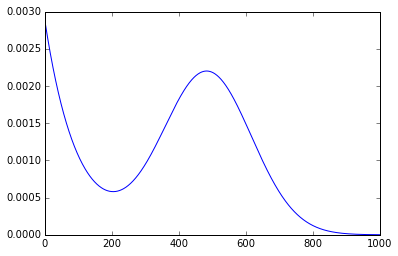

In [7]:
x=frange(0.0,1000.0)
plot(x,asarray(list(map(lambda xx:ses.value_1d(xx),x))))

In [8]:
print(scipy.integrate.quad(lambda xx:ses.value_1d(xx),0,100000))

(0.9999999999999998, 1.0930855162236863e-11)


In [9]:
g = zeros(0)
ses.value_and_parameter_gradient_1d(0.0,g)
print(g)

[  1.02424234e-02  -2.93939801e-05  -6.99774608e-08   2.38471856e-07]


In [17]:
h = zeros([5,5])
ses.value_parameter_gradient_and_hessian_1d(0.0,g,h)
print(g)
print(h)

[  1.02424234e-02  -2.93939801e-05  -6.99774608e-08   2.38471856e-07]
[[  0.00000000e+00  -1.04978500e-04   9.71909178e-08  -3.31210911e-07]
 [ -1.04978500e-04   6.02335658e-07   0.00000000e+00   0.00000000e+00]
 [  9.71909178e-08   0.00000000e+00   1.81120704e-09  -5.60179203e-09]
 [ -3.31210911e-07   0.00000000e+00  -5.60179203e-09   1.69907723e-08]]
